<a href="https://colab.research.google.com/github/vinayprabhu/Favorite_PyPi_2020/blob/main/Colab_Pypi_Top10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A machine learning practitioner's list of 10 under-appreciated PyPi packages.

- Resources curated:
Github :👉🏻: https://github.com/vinayprabhu/Favorite_PyPi_2020
- PDF summary with clickable links to the packages :👉🏻 : https://github.com/vinayprabhu/Favorite_PyPi_2020/blob/main/PyPi_2020_collage.pdf


**Introduction:**

"*The power of Open Source is the power of the people. The people rule*": Philippe Kahn
Ever since my doctoral studies that mostly entailed performing statistical analysis in R ( and admittedly Octave/MATLAB), I have strongly embraced the emergence of Python as the lingua franca amongst machine learners / data scientists / *insert latest profession-buzzword here*. 

My daily workflow involves quickly reacting to the vagaries of messy real-world data, with all it's glorious aleatoric and epistemic uncertainties. One major difference between graduate school and industry to me is the conquest of the inner-ego that goads you to implement algorithms from scratch. Once past the white-boarding/hypothesis building phase I quickly parse through the PyPi repository to check if any of the constituent modules have already been authored. This is typically followed by a
```
pip install *PACKAGE_NAME* 
```
ritual and voila, I find myself standing on the shoulders of the open-source giants whose careful work I am now harnessing to scale the DIKW pyramid.
I authored this blogpost to acknowledge, celebrate and yes, publicize, some amazing and under-appreciated PyPi packages that I used this past year; ones that I strongly feel deserve more recognition and love from our community. This is also my humble ode to the open-source scholars' sweat equity that oft gets buried inside the pip install command.

*Caveat on sub-domain bias*: This particular post is focused on machine learning pipelines entailing neural networks/deep learning. I plan to author similarly focused blogposts on specialized topics such as time-series analysis and human-kinematics analysis in the near future.
What follows below are basic introductions into the 10 PyPi packages spanning: 

a) Neural network architecture specification and training: NSL-tf, Kymatio and LARQ

b) Post training calibration and performance benchmarking: NetCal, PyEER and Baycomp.

c) Pre real-world deployment stress-testing: PyOD, HyPPO and Gradio

d) Documentation / dissemination: Jupyter_to_medium


# 0: Pip install the above mentioned packages :)

In [ ]:
!pip install --quiet neural-structured-learning
!pip install --quiet larq larq-zoo 
!pip install --quiet kymatio
!pip install --quiet netcal
!pip install --quiet baycomp
!pip install --quiet pyeer
!pip install --quiet pyod
!pip install --quiet hyppo
!pip install --quiet gradio
!pip install --quiet jupyter_to_medium

# 1: [NSL](https://www.tensorflow.org/neural_structured_learning) : Neural Structured Learning (NSL) in tensorflow

At the heart of most off-the-shelf classification algorithms in machine learning lies the i.i.d fallacy. Simply put, the algorithms design rests on the fact that the samples in the training set (as well as the test-set) are independent and identically distributed. In reality, this rarely holds true and there exist correlations between the samples that can be harnessed to attain better accuracy and explainability as well. In a wide array of application scenarios, these correlations are captured by an underlying graph $(G(V,E))$ that can either be co-mined or statistically inferred. For example, if you are performing, say, sentiment detection of textual-tweets, the underlying follower-following social graph provides vital cues that models the social context in which the tweet was authored. This social neighborhood information can then be harnessed to perform network-aided classification that can be crucial in guarding against text-only shortcomings such as sarcasm mis-detection and hashtag-hijacking.

In my PhD thesis titled "[Network Aided Classification and Detection of Data](https://kilthub.cmu.edu/articles/thesis/Network_Aided_Classification_and_Detection_of_Data/7430012/1)", I explored the science and algorithmics of this graph-enhanced machine learning and it was so heartening to see Tensorflow release the Neural structured learning framework along with a series of well crafted tutorials ( Here's my [playlist](https://www.youtube.com/watch?v=N_IS3x5wFNI&list=PLS6Lwe0CFTqbS8WxxPmil0mCjAHZ0rD1x&ab_channel=TensorFlow) of all the videos) along with an easy-to-follow NSL Example colab-notebook. In the example cell below, we train a NSL-enhanced neural network for the standard MNIST dataset in an adversarial setting:

Links: 
- [PhD thesis](https://kilthub.cmu.edu/articles/thesis/Network_Aided_Classification_and_Detection_of_Data/7430012/1)
- [NSL Example Notebook](https://colab.research.google.com/drive/1yidXh-kM6fMi5c0yEXonvG4GFdcDO0-d#scrollTo=gRfU8T3BTYep&line=2&uniqifier=1)

In [ ]:
import tensorflow as tf
import neural_structured_learning as nsl
import numpy as np
import matplotlib.pyplot as plt

# Prepare data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.Input((28, 28), name='feature'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Wrap the model with adversarial regularization.
adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

# Compile, train, and evaluate.
adv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
adv_model.fit({'feature': x_train, 'label': y_train}, batch_size=32, epochs=5)
adv_model.evaluate({'feature': x_test, 'label': y_test})

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f0aeb988e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f0aeb988e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f0aeb988e58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1875/1875 [==============================] - 39s 2ms/step - loss: 0.5215 - sparse_categorical_crossentropy: 0.4292 - sparse_categorical_accuracy: 0.8781 - scaled_adversarial_loss: 0.0924
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1447 - sparse_categorical_crossentropy: 0.1171 - sparse_categorical_accuracy: 0.9663 - scaled_adversarial_loss: 0.0276
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0944 - sparse_categorical_crossentropy: 0.0758 - sparse_categorical_accuracy: 0.9770 - scaled_adversarial_loss: 0.0186
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - sparse_categorical_crossentropy: 0.0536 - sparse_categorical_accuracy: 0.9840 - scaled_adversarial_loss: 0.0137
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - sparse_categorical_crossentropy: 0.0421 - sparse_categorical_accuracy: 0.9876 - scaled_adversarial_loss: 0.0111


313/313 [==============================] - 1s 2ms/step - loss: 0.0940 - sparse_categorical_crossentropy: 0.0751 - sparse_categorical_accuracy: 0.9761 - scaled_adversarial_loss: 0.0189


[0.09399436414241791,
 0.07509651780128479,
 0.9761000275611877,
 0.018897896632552147]

In [ ]:
Y_pred_test=adv_model.predict({'feature': x_test, 'label': y_test})
Y_pred_test.shape

(10000, 10)

#[Netcal](https://pypi.org/project/netcal/)
Often times, I have seen ML practitioners buy into this false equivalence between the output softmax values and probabilities. They are anything but that! Their co-inhabitance of the (0,1] space allows them to masquerade as probabilities but the 'raw' softmax values are, well, 'uncalibrated' put nicely. Hence, post-training calibration is a rapidly growing body of work in deep learning, and the techniques proposed herewith largely falls into 3 categories 
- Binning (Ex: Histogram Binning, Isotonic Regression, Bayesian Binning into Quantiles (BBQ), Ensemble of Near Isotonic Regression (ENIR))
- Scaling (Ex: Logistic Calibration/Platt Scaling, Temperature Scaling , Beta Calibration)
- Hybrid scaling-binning [1] (Python library: https://pypi.org/project/uncertainty-calibration)
```
!pip3 install git+https://github.com/p-lambda/verified_calibration.git # PyPi--> Kaput
```

With regards to all the above stated Binning and Scaling techniques, the implementations with extremely well authored documentation is available in the NetCal. The package also included primitives for generating Reliability Diagrams and estimating calibration error metrics such as Expected /Max/Average Calibration Errors as well.
In the cell below, we see use the obtained softmax values on the MNIST test-set (from the NSL trained model above) to demonstrate the usage of the Temperature Scaling calibration and Reliability-Diagram generation routines.

Reference:
[1]  https://arxiv.org/pdf/1909.10155.pdf


In [ ]:
from netcal.scaling import TemperatureScaling
import matplotlib.pyplot as plt

### Initialize and transform

temperature = TemperatureScaling()
temperature.fit(Y_pred_test, y_test)
calibrated = temperature.transform(Y_pred_test)
### Visualization

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
axes[0].matshow(Y_pred_test.T,aspect='auto', cmap='jet')
axes[0].set_title("Original Uncalibrated softmax")
axes[0].set_xlabel("Test image index (10k images)")
axes[0].set_ylabel("Class index")
# axes[0].set_xticks([])
axes[1].matshow(calibrated.T,aspect='auto', cmap='jet')
axes[1].set_title("T-scaled softmax")
axes[1].set_xlabel("Test image index (10k images)")
# axes[1].set_xticks([])
plt.tight_layout()
plt.show()

ModuleNotFoundError: ignored

In [ ]:
Reference: https://arxiv.org/pdf/1909.10155.pdfy_pred_nsl=np.argmax(Y_pred_test,axis=1)
ind_correct=np.where(y_pred_nsl==y_test)[0]
ind_wrong=np.where(y_pred_nsl!=y_test)[0]

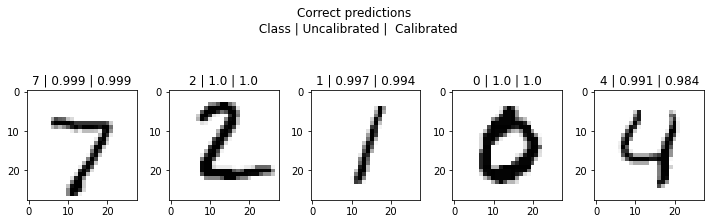

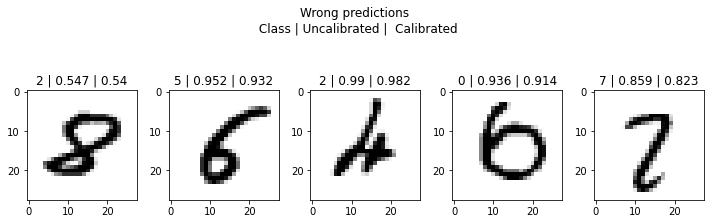

In [ ]:
plt.figure(figsize=(10,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  ind_i=ind_correct[i]
  plt.imshow(x_test[ind_i],cmap='gray_r')
  class_pred_i=np.argmax(Y_pred_test[ind_i,:])
  softmax_uncalib_i=str(np.round(Y_pred_test[ind_i,class_pred_i],3))
  softmax_calib_i=str(np.round(calibrated[ind_i,class_pred_i],3))
  plt.title(f'{class_pred_i} | {softmax_uncalib_i} | {softmax_calib_i}')
plt.tight_layout()
plt.suptitle('Correct predictions \n Class | Uncalibrated |  Calibrated');
#############################################
plt.figure(figsize=(10,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  ind_i=ind_wrong[i]
  plt.imshow(x_test[ind_i],cmap='gray_r')
  class_pred_i=np.argmax(Y_pred_test[ind_i,:])
  softmax_uncalib_i=str(np.round(Y_pred_test[ind_i,class_pred_i],3))
  softmax_calib_i=str(np.round(calibrated[ind_i,class_pred_i],3))
  plt.title(f'{class_pred_i} | {softmax_uncalib_i} | {softmax_calib_i}')
plt.tight_layout()
plt.suptitle('Wrong predictions \n Class | Uncalibrated |  Calibrated');



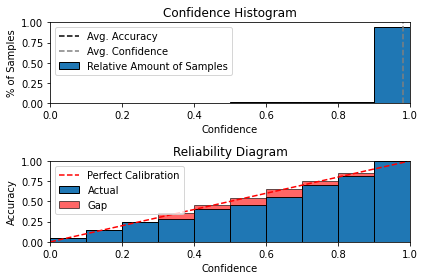

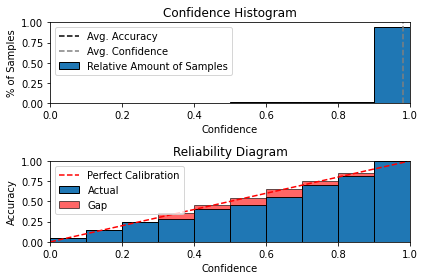

In [ ]:
from netcal.presentation import ReliabilityDiagram
n_bins = 10
diagram = ReliabilityDiagram(n_bins)
diagram.plot(Y_pred_test, y_test)  # visualize miscalibration of uncalibrated

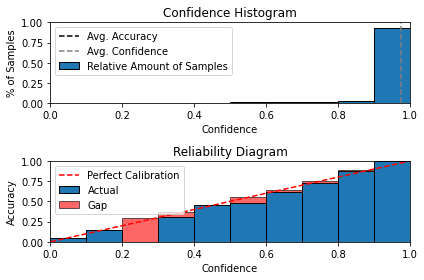

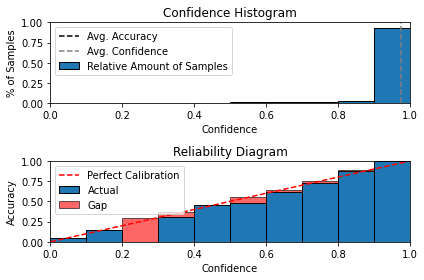

In [ ]:
diagram.plot(calibrated, y_test)   # visualize miscalibration of calibrated

# Kymatio: Wavelet scattering in Python
Here's one of the best (or worst?) kept secrets in ML. A lot of the easy datasets (read the x-mnist family / cats-v-dogs / Hot-Dog classification) require NO backprop/SGD training histrionics. 
The classes are separable enough and the architecture-induced inductive biases are strong enough that careful initialization using Grassmannian codebooks or wavelet filters followed by 'last-layer' hyper-plane learning (using standard regression techniques) should suffice to obtain a high-accuracy classifier. 

In this regard, Kymatio has played a Caesar-esque role in the wavelet filters world uniting all the previous siloed projects such as ScatNet, scattering.m, PyScatWave, WaveletScattering.jl, and PyScatHarm into one easy to use monolithic portable framework that seamlessly works across six frontend–backend pairs: NumPy (CPU), scikit-learn (CPU), pure PyTorch (CPU and GPU), PyTorch+scikit-cuda (GPU), TensorFlow (CPU and GPU), and Keras (CPU and GPU). 

In the example cell below, we use the in-built Scattering2D class to train another MNIST-neural network that attains 92.84% accuracy in 15 epochs. This package is wonderfully documented with a plethora of interesting examples such as Classification of spoken digit recordings using 1D scattering transforms and 3D scattering quantum chemistry regression.

In [ ]:
# 1: Imports

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from kymatio.keras import Scattering2D
# Above, we import the Scattering2D class from the kymatio.keras package.

# 2: Model definition

inputs = Input(shape=(28, 28))
x = Scattering2D(J=3, L=8)(inputs)
x = Flatten()(x)
x_out = Dense(10, activation='softmax')(x)
model_kymatio = Model(inputs, x_out)
print(model_kymatio.summary())

# 3: Compile and train

model_kymatio.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# We then train the model_kymatio using model_kymatio.fit on a subset of the MNIST data.
model_kymatio.fit(x_train[:10000], y_train[:10000], epochs=15,
          batch_size=64, validation_split=0.2)
# Finally, we evaluate the model_kymatio on the held-out test data.

model_kymatio.evaluate(x_test, y_test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
scattering2d (Scattering2D)  (None, 217, 3, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1953)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                19540     
Total params: 19,540
Trainable params: 19,540
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
125/125 [==============================] - 33s 188ms/step - loss: 2.2352 - accuracy: 0.2575 - val_loss: 2.0351 - val_accuracy: 0.7615
Epoch 2/15
125/125 [==============================] - 18s 144ms/step - loss: 1.9826 - accuracy: 0.8107 - 

[0.6448228359222412, 0.9284999966621399]

# [LARQ](https://docs.larq.dev/zoo/tutorials/)


I met the LARQ developers last December during NEURIPS-2019 in Vancouver where they unveiled their new open-source Python library for training Binarized Neural Networks (BNNs) alongside the poster of their paper titled Latent Weights Do Not Exist: Rethinking Binarized
Neural Network Optimization. While there seems to be a lot of interest towards model compression for resource constrained on-device deployment (Here's 42 of 'em!), training fast-and-frugal Binary Neural Networks from scratch seems to be an option that many seem to discount at the outset. 

The LARQ package should help change things on that front given the ease of use, fast inference (Convolution operations turn into xor/bit-shifts with binarized weights), brilliant documentation and plentiful architecture examples that one can then hack away by means of a full-fledged model zoo. This year, I have personally published work on style-transfer and a 40 kB BiPedalNet model using LARQ and it's always a breeze to work with this toolkit. Besides the Zoo, the package is also accompanied by a highly optimized Compute Engine that currently supports various mobile platforms, has been benchmarked on a Pixel 1 phone & Raspberry Pi and also provides a collection of hand-optimized TensorFlow Lite custom operators for supported instruction sets, developed in inline assembly or in C++ using compiler intrinsics. 

In the example code cell below, we train a 13.19 KB BNN that hits 98.31 % on the MNIST dataset in 6 epochs and also demonstrate how easy it is to pull one of the SOTA pre-trained QuickNet models from the LARQ-zoo and run inference.

In [ ]:
import larq as lq
# MODEL DEFINITION (All quantized layers except the first will use the same options)

kwargs = dict(input_quantizer="ste_sign",
              kernel_quantizer="ste_sign",
              kernel_constraint="weight_clip")

model_bnn = tf.keras.models.Sequential()

# In the first layer we only quantize the weights and not the input
model_bnn.add(lq.layers.QuantConv2D(32, (3, 3),
                                kernel_quantizer="ste_sign",
                                kernel_constraint="weight_clip",
                                use_bias=False,
                                input_shape=(28, 28, 1)))
model_bnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))

model_bnn.add(lq.layers.QuantConv2D(64, (3, 3), use_bias=False, **kwargs))
model_bnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))

model_bnn.add(lq.layers.QuantConv2D(64, (3, 3), use_bias=False, **kwargs))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))
model_bnn.add(tf.keras.layers.Flatten())

model_bnn.add(lq.layers.QuantDense(64, use_bias=False, **kwargs))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))
model_bnn.add(lq.layers.QuantDense(10, use_bias=False, **kwargs))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))
model_bnn.add(tf.keras.layers.Activation("softmax"))

# MODEL DEFINITON AND TRAINING 

print(lq.models.summary(model_bnn))
model_bnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

x_train_bnn = x_train.reshape((60000, 28, 28, 1))
x_test_bnn = x_test.reshape((10000, 28, 28, 1))
model_bnn.fit(x_train_bnn,y_train, batch_size=64, epochs=6)

test_loss, test_acc = model_bnn.evaluate(x_test_bnn, y_test)
print(f"Test accuracy {test_acc * 100:.2f} %")

+sequential_1 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| quant_conv2d                     -  (-1, 26, 26, 32)      288         0    0.04           0       194688 |
| max_pooling2d                    -  (-1, 13, 13, 32)        0         0       0           0            0 |
| batch_normalization              -  (-1, 13, 13, 32)        0        64    0.25           0            0 |
| quant_conv2d_1                   1  (-1, 11, 11, 64)    18432         0    2.25     2230272            0 |
| max_pooling2d_1                  -    (-1, 5, 5, 64)        0         0       0           0            0 |
| batch_normalizati

In [ ]:
Y_pred_bnn = model_bnn.predict(x_test_bnn)
y_pred_bnn=np.argmax(Y_pred_bnn,axis=1)
(y_pred_bnn==y_test).mean()

0.9831

Top-5 predictions: [('n02504458', 'African_elephant', 0.7053231), ('n01871265', 'tusker', 0.2933379), ('n02504013', 'Indian_elephant', 0.001338586), ('n02408429', 'water_buffalo', 7.938418e-08), ('n01704323', 'triceratops', 7.2361296e-08)]


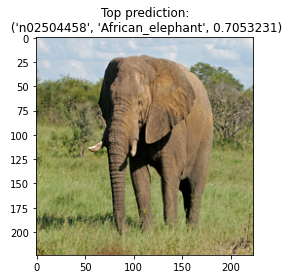

In [ ]:
import tensorflow_datasets as tfds
import larq_zoo as lqz
from urllib.request import urlopen
from PIL import Image
#####################################

img_path = "https://raw.githubusercontent.com/larq/zoo/master/tests/fixtures/elephant.jpg"

with urlopen(img_path) as f:
    img = Image.open(f).resize((224, 224))

x = tf.keras.preprocessing.image.img_to_array(img)
x = lqz.preprocess_input(x)
x = np.expand_dims(x, axis=0)
model = lqz.sota.QuickNet(weights="imagenet")
preds = model.predict(x)
pred_dec=lqz.decode_predictions(preds, top=5)[0]
print(f'Top-5 predictions: {pred_dec}')

#####################################

pred_dec=lqz.decode_predictions(preds, top=5)[0]
plt.imshow(img)
plt.title(f'Top prediction:\n {pred_dec[0]}');

#  [Baycomp](https://baycomp.readthedocs.io/) : So you think you have a better classifier?

One of the under-rated conundrums that both ML practitioners and in some ways, research paper reviewers, grapple with, is rigorously ascertaining the predictive supremacy of one classifier model over the other(s). Model-Olympics platforms like Papers with code further promulgate this model-ranking fallacy by erroneously centering the top-1 accuracy metric as the deciding measure. 
Source: https://paperswithcode.com/sota/image-classification-on-inaturalist-2018

So, given two classifications models with similar engineering overheads to deploy, how do you choose one over the other? Typically, we have a standard benchmarking dataset (or a set of datasets) that serve as the testing ground for classifier-wars. After obtaining the 'raw accuracy metrics over this dataset-space' a statistical minded machine learner might be inclined to use tools from the frequentist null hypothesis significance testing (NHST) framework to establish which classifier is 'better'. However, as stated here, "Many scientific fields however realized the shortcomings of frequentist reasoning and in the most radical cases even banned its use in publications". Baycomp emerges in this context  providing a Bayesian framework for comparison of classifiers. The library helps compute three probabilities: 
- $P_{left}$ : The probability that the first classifier has higher accuracy scores than the second.
- $P_{rope}$: The probability that differences are within the region of practical equivalence (rope)
- $P_{right}$: The probability that the second classifier has higher scores.
The region of practical equivalence (rope) is specified by the machine learner who is well versed with what could be safely assumed to be equivalent in the domain of deployment.
In the example cell below, we consider both, a synthetic example entailing two closely competitive classifiers as well as the two classifiers we just trained using the NSL-TF and LARQ-BNN frameworks on the MNIST dataset




In [ ]:
# Helper function to plot the accuracies
def bar_plt2(acc_1,acc_2,label_1='Legacy classifier',label_2='New classifier',X_LABELS=['default'],Category_x='Dataset'):
  # set width of bar

  if(X_LABELS==['default']):
    X_LABELS=list(string.ascii_uppercase[0:len(acc_1)])
  barWidth = 0.25
  
  # Set position of bar on X axis
  r1 = np.arange(len(acc_1))
  r2 = [x + barWidth for x in r1]
  
  # Make the plot
  plt.bar(r1, acc_1, color='#7f6d5f', width=barWidth, edgecolor='white', label=label_1)
  plt.bar(r2, acc_2, color='#557f2d', width=barWidth, edgecolor='white', label=label_2)
  
  # Add xticks on the middle of the group bars
  plt.xlabel(Category_x, fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(acc_1))],X_LABELS)
  plt.title('Accuracy comparison of the two classifiers') 

  # Create legend & Show graphic
  plt.legend()
  plt.show()
  return None

The mean accuracies of the two classifiers are: 82.0 and 81.8


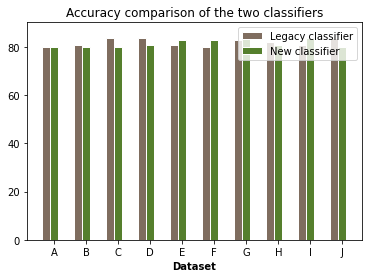

In [ ]:
import string
from baycomp import *
# First, let us generate two synthetic classifier accuracy vectors across 10 hypothetical datasets.
# Accuracies obtained by a legacy classifier
classifier_legacy_acc=np.random.randint(80,85,size=(10))
mean_legacy=np.mean(classifier_legacy_acc)
# Accuracies obtained by a new-proposed classifier
classifier_new_acc=np.random.randint(80,87,size=(10))
mean_new=np.mean(classifier_new_acc)
print(f'The mean accuracies of the two classifiers are: {mean_legacy} and {mean_new}')

bar_plt2(classifier_legacy_acc,classifier_new_acc)

 They compute three probabilities: the probability that the first classifier has higher scores than the second, the probability that differences are within the region of practical equivalence (rope), or that the second classifier has higher scores. We will refer to this probabilities as:
  $p_{left}, p_{rope} \text{and }p_{right}$.

  1: Two shortcut functions can be used for comparison on single and
 on multiple data sets. 
 If classifier_legacy_acc and classifier_new_acc contain a list of 
 average classification accuracies of classifier-legacy and 
classifier-new on a collection of data sets, we can call
(Actual outputs may differ due to Monte Carlo sampling.)

$p_{left}, p_{rope},p_{right}$ using the two_on_multiple function: 
(0.28222, 0.4604, 0.25738)
$p_{left}, p_{rope},p_{right}$ using the SignedRankTest.probs function: 
(0.28288, 0.46088, 0.25624)
Figure(432x288)
(0.28056, 0.46356, 0.25588)


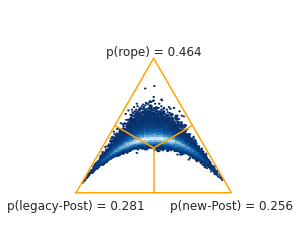

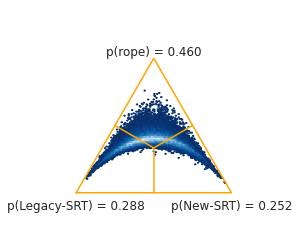

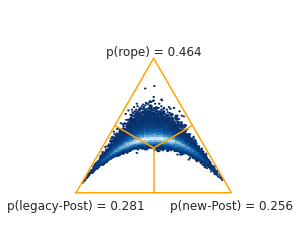

In [ ]:
print('$p_{left}, p_{rope},p_{right}$ using the two_on_multiple function: ')
print(two_on_multiple(classifier_legacy_acc, classifier_new_acc, rope=1))

# With some additional arguments, the function can also plot the posterior distribution from 
# which these probabilities came.
# Tests are packed into test classes. 
# The above call is equivalent to

print('$p_{left}, p_{rope},p_{right}$ using the SignedRankTest.probs function: ')
print(SignedRankTest.probs(classifier_legacy_acc, classifier_new_acc, rope=1))

# and to get a plot, we call

print(SignedRankTest.plot(classifier_legacy_acc, classifier_new_acc, rope=1, names=("Legacy-SRT", "New-SRT")))

# To switch to another test, use another class:
SignTest.probs(classifier_legacy_acc, classifier_new_acc, rope=1)
# Finally, we can construct and query sampled posterior distributions.

posterior = SignedRankTest(classifier_legacy_acc, classifier_new_acc, rope=1)
print(posterior.probs())
posterior.plot(names=("legacy-Post", "new-Post"))



Using baycomp to compare the NSL classifier with the BNN classifier on the MNIST dataset:

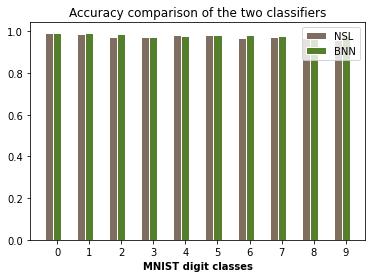

(0.0, 0.2846, 0.7154)


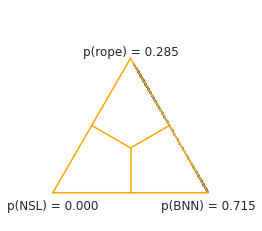

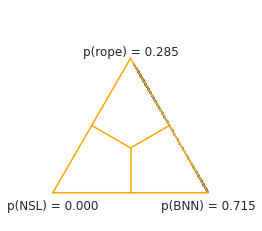

In [ ]:
acc_bnn=np.zeros(10)
acc_nsl=np.zeros(10)
for c in range(10):
  mask_c=y_test==c
  acc_bnn[c]= (y_pred_bnn[mask_c]==c).mean()
  acc_nsl[c]= (y_pred_nsl[mask_c]==c).mean()

bar_plt2(acc_nsl,acc_bnn,label_1='NSL',label_2='BNN',X_LABELS=list(np.arange(10).astype(str)),Category_x='MNIST digit classes')
posterior = SignedRankTest(acc_nsl, acc_bnn, rope=0.005)
print(posterior.probs())
posterior.plot(names=("NSL", "BNN"))

[PYOD](https://pyod.readthedocs.io/en/latest/)

PyOD is arguably the most comprehensive and scalable Outlier Detection Python toolkit out there that includes implementation of more than 30 detection algorithms!
It is somewhat rare for a student-maintained PyPi package to incorporate software engineering best practices that ensures that model classes implemented are covered by unit testing with cross platform continuous integration, code coverage and code maintainability checks. This combined with a a clean unified API, detailed documentation and just-in-time (JIT) compiled execution makes it an absolute breeze to both learn about the different techniques and use it in practice. The efforts invested by the authors towards careful parallelization has resulted in extremely fast and scalable outlier detection code that is also seamlessly compatible across Python 2 and 3 across major operating systems (Windows, Linux and MacOS).
In the example cell below, we train and visualize the results of two inlier-outlier detector binary classifiers on a synthetic dataset: the Angle-Based Outlier Detector (ABOD)and the KNN outlier detector.

In [ ]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN   # kNN detector
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


# Generate sample data with pyod.utils.data.generate_data():

contamination = 0.4  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train_ood, y_train_ood, X_test_ood, y_test_ood = generate_data(n_train=n_train, n_test=n_test, contamination=contamination)
##### 1: ABOD
clf_name_1 = 'ABOD'
clf_abod = ABOD(method="fast") # initialize detector
clf_abod.fit(X_train_ood)

y_train_pred_abod = clf_abod.predict(X_train_ood) # binary labels
y_test_pred_abod = clf_abod.predict(X_test_ood) # binary labels

y_test_scores_abod = clf_abod.decision_function(X_test_ood) # raw outlier scores
y_test_proba_abod = clf_abod.predict_proba(X_test_ood) # outlier probability

evaluate_print("ABOD", y_test_ood, y_test_scores_abod) # performance evaluation

####### 2 : KNN
clf_knn = KNN() # initialize detector
clf_knn.fit(X_train_ood)

y_train_pred_knn = clf_knn.predict(X_train_ood) # binary labels
y_test_pred_knn = clf_knn.predict(X_test_ood) # binary labels

y_test_scores_knn = clf_knn.decision_function(X_test_ood) # raw outlier scores
y_test_proba_knn = clf_knn.predict_proba(X_test_ood) # outlier probability

evaluate_print("KNN", y_test_ood, y_test_scores_knn) # performance evaluation

ABOD ROC:0.9992, precision @ rank n:0.975
KNN ROC:1.0, precision @ rank n:1.0


/usr/local/lib/python3.6/dist-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


Now, let's visualize the results:

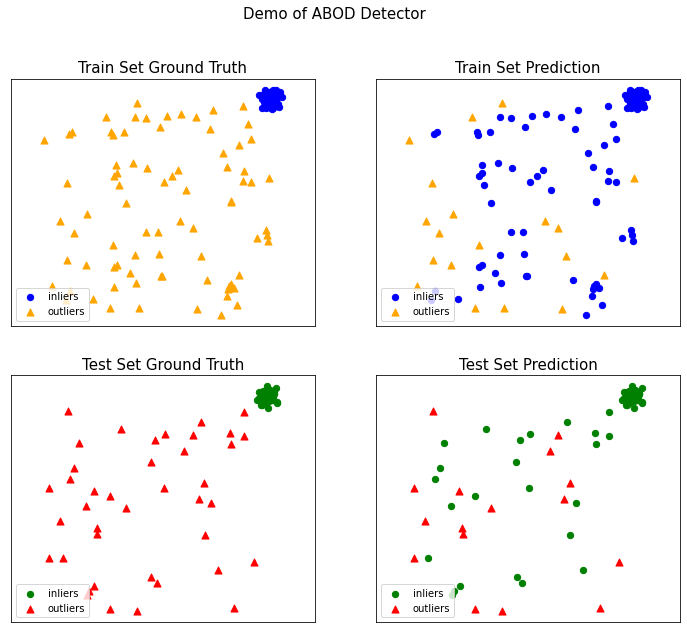

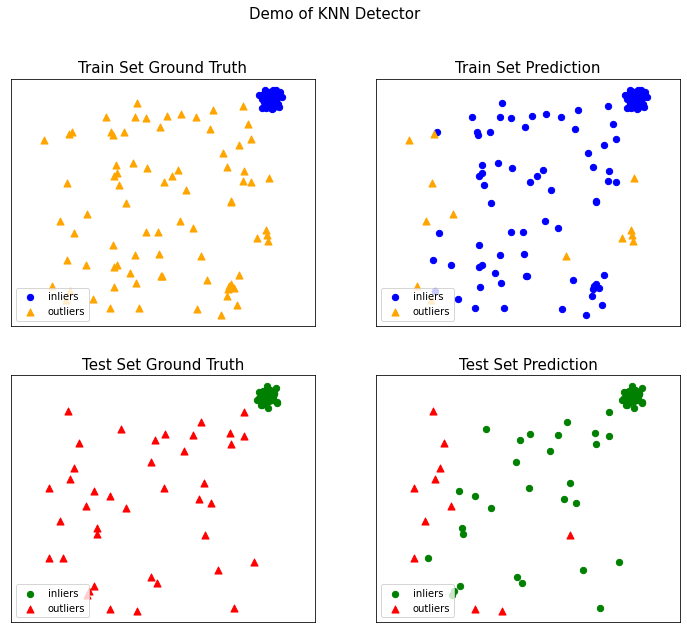

In [ ]:
# ABOD Performance
visualize("ABOD", X_train_ood, y_train_ood, X_test_ood, y_test_ood, y_train_pred_abod,
          y_test_pred_abod, show_figure=True, save_figure=False)
# KNN Performance;
visualize("KNN", X_train_ood, y_train_ood, X_test_ood, y_test_ood, y_train_pred_knn,
          y_test_pred_knn, show_figure=True, save_figure=False)


[PyEER](https://pypi.org/project/pyeer/)

Another way of comparing two classifiers, especially in the context of solving the binary authentication problem (Not surveillance but Authentication) is by plotting the comparative detection error tradeoff (DET) and Receiver operating characteristic (ROC) graphs. PyEER is an absolute tour-de-force in this regard as it serves as a one-stop-shop for not just plotting the relevant graphs but also auto-generating metrics-reports and estimating EER-optimal-thresholds. In the example cell below, we compare the Angle-Based Outlier Detector (ABOD)and the KNN inlier-outlier detector binary classifiers that'll be introduced in the forthcoming section on pre-deployment Out-of-Distribution detection techniques.


EER-KNN = 0.0, EER-ABOD = 0.008333333333333333


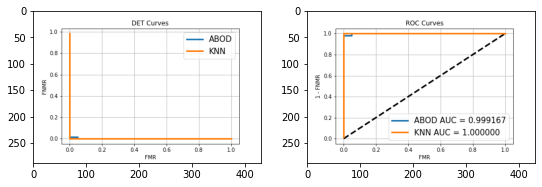

In [ ]:
from pyeer.eer_info import get_eer_stats
from pyeer.report import generate_eer_report, export_error_rates
from pyeer.plot import plot_eer_stats

# Gather up all the 'Genuine scores' and the 'impostor scores'

gscores_abod=y_test_proba_abod[y_test_ood==0,0]
iscores_abod=y_test_proba_abod[y_test_ood==1,0]

gscores_knn=y_test_proba_knn[y_test_ood==0,0]
iscores_knn=y_test_proba_knn[y_test_ood==1,0]

# Calculating stats for classifier A
stats_abod = get_eer_stats(gscores_abod, iscores_abod)

# Calculating stats for classifier B
stats_knn = get_eer_stats(gscores_knn, iscores_knn)
print(f'EER-KNN = {stats_knn.eer}, EER-ABOD = {stats_abod.eer}')
plot_eer_stats([stats_abod, stats_knn], ['ABOD', 'KNN'])
import matplotlib.image as mpimg
img1 = mpimg.imread('DET.png')
img2 = mpimg.imread('ROC.png')

plt.figure(figsize=(9,4))
plt.subplot(121)
plt.imshow(img1)

plt.subplot(122)
plt.imshow(img2)
plt.show()

# [hyppo](https://hyppo.neurodata.io/index.html)
It is somewhat bewildering to witness this collective amnesia on part of the Deep Learning community that keeps treating OOD susceptibility as a uniquely 'deep neural networks' shortcoming that somehow merits a deep-learning-solution  whilst completing ignoring the cache of approaches and solutions already explored by the statistics community. 

One could argue that OOD-detection by it's very definition falls under the ambit of the multivariate hypothesis testing framework, and hence it is frustrating to see deep learning OOD papers not even benchmark the results obtained by their shiny new deep-approaches with what could be possible legacy  hypothesis testing algorithms. With this setting, we now introduce HYPPO. 

HYPPO (HYPothesis Testing in PythOn, pronounced "Hippo") is arguably the most comprehensive open-source software package for multivariate hypothesis testing produced by the NEURODATA community. In the figure below, we see the landscape of modules implemnetd in this package that spans synthetic data generation (with 20 dependency structures!), Independence Tests, K-sample Tests as well as Time-Series Tests.

In [ ]:
from hyppo.ksample import KSample
samp_in_train= X_train_ood[y_train_ood==0]
samp_out_train= X_train_ood[y_train_ood==1]

samp_in_test= X_test_ood[y_test_ood==0]
samp_out_test= X_test_ood[y_test_ood==1]


stat_in_out, pvalue_in_out = KSample("Dcorr").test(samp_in_train, samp_out_test)
print(f'In-train v/s Out-test \n Energy test statistic: {stat_in_out}. Energy p-value: {pvalue_in_out}')

stat_out_in, pvalue_out_in = KSample("Dcorr").test(samp_in_test, samp_out_train)
print(f'In-test v/s Out-train \n Energy test statistic: {stat_out_in}. Energy p-value: {pvalue_out_in}')

stat_in_in, pvalue_in_in = KSample("Dcorr").test(samp_in_train, samp_in_test)
print(f'In-train v/s In-test \n Energy test statistic: {stat_in_in}. Energy p-value: {pvalue_in_in}')

stat_out_out, pvalue_out_out = KSample("Dcorr").test(samp_out_train, samp_out_test)
print(f'Out-train v/s Out-test \n Energy test statistic: {stat_out_out}. Energy p-value: {pvalue_out_out}')

In-train v/s Out-test 
 Energy test statistic: 0.8626341445137959. Energy p-value: 4.357148137679374e-32
In-test v/s Out-train 
 Energy test statistic: 0.7584832208162725. Energy p-value: 4.0495216242247524e-25
In-train v/s In-test 
 Energy test statistic: -0.005691336487203311. Energy p-value: 1.0
Out-train v/s Out-test 
 Energy test statistic: 0.006631965940452427. Energy p-value: 0.18021672902891694


# [Gradio](https://gradio.app/ml_examples)

Having a nice GUI to interact with the model you have just trained has thus far required a fair amount of JavaScript-front-end gimmickry or the Heroku-Flask route that can take focus away from the algorithmics.
Thanks to Gradio, one can can quickly fire up a gui with $<10$ lines of Python with pre-built input modules that cover textual input, image-inputs with an awesome Toast-UI image-editor and a sketchpad to boot as well!
This past year, I have heavily used Gradio in my workflow, using it to investigate why Twitter's saliency cropping algorithm yields such racist results to why Onions were triggering NSFW filters on facebook (See the blogpost for the links and imagery).


(The NSFW-Onion fiasco Colab notebook can be found [here](https://github.com/vinayprabhu/Crimes_of_Vision_Datasets/blob/master/Notebooks/Notebook_5b_Onion_Gradio_NSFW.ipynb) ).

In the example cell below, we demonstrate two simple examples of using Gradio to fire-up UIs to stress-test the MNIST classification BNN model we just trained above with a sketchpad input and to demonstrate the ease of using the InceptionV3 model to classify images. The Gradio team has also rapidly added explainaibility and embeddings-visualization tools, and implemented SOTA blind super resolution and Real-Time High-Resolution Background Matting UIs as well!


[Saliency hub link](http://saliency-model.gradiohub.com/)

```
import gradio as gr
import requests
inception_net = tf.keras.applications.InceptionV3() # load the model
# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def classify_image(inp):
  print(inp.shape)
  inp = inp.reshape((-1, 299, 299, 3))
  inp = tf.keras.applications.inception_v3.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(299, 299, 3))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True).launch()
```

In [ ]:
import gradio as gr
import requests

# We use the LARQ trained BNN to launch an interactive UI that facilitates a sktechpad inoput and prediction
def classify(image):
  print(image.shape)
  prediction = model_bnn.predict(image.reshape((-1,28,28,1))).tolist()[0]
  return {str(i): prediction[i] for i in range(10)}
 
sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes=3)
gr.Interface(fn=classify, inputs=sketchpad, outputs=label, capture_session=True).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
This share link will expire in 24 hours. If you need a permanent link, email support@gradio.app
Running on External URL: https://53999.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7871/',
 'https://53999.gradio.app')

In [ ]:
inception_net = tf.keras.applications.InceptionV3() # load the model
# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")
 
def classify_image(inp):
  print(inp.shape)
  inp = inp.reshape((-1, 299, 299, 3))
  inp = tf.keras.applications.inception_v3.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}
 
image = gr.inputs.Image(shape=(299, 299))
label = gr.outputs.Label(num_top_classes=3)
 
gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
This share link will expire in 24 hours. If you need a permanent link, email support@gradio.app
Running on External URL: https://48101.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7870/',
 'https://48101.gradio.app')